Machines, or rather computers, do not learn information the same way that us humans do. Whereas humans are better at learning general concepts, computers are more adept at learning how to perform highly specific tasks. We supply a computer with data so that it can try to derive useful patterns from the data itself. This process of extracting patterns from data is what we call **machine learning**.

We'll learn about the process of machine learning and how to perform it through the example of an algorithm called the **k-nearest neighbors algorithm**. We'll call this process the **machine learning workflow**. We call it a workflow, because it is a general process that people can follow to perform many basic machine learning tasks.

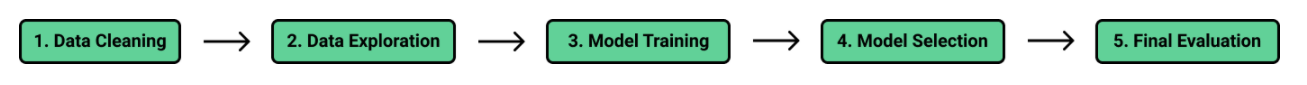

The k-nearest neighbors algorithm is just one of many machine learning algorithms, but the workflow is algorithm-agnostic, meaning that it can be used no matter what the algorithm. Learning this workflow first will help make learning and using more algorithms easier in the future. Before we dive further into the learning process, let's get familiar with the dataset we'll be working with.

**Task**

1. Read `dc_airbnb.csv` into a tibble named `dc_listings` using `read.csv()` from the `readr` library. 

2. Is there missing data? Assign `TRUE` to the variable `has_missing` if so, and `FALSE` otherwise.


**Answer**

`library(readr)
dc_listings <- read.csv('dc_airbnb.csv')
colnames(dc_listings)
has_missing <- TRUE`

We developed the problem statement that we wanted to solve with the Airbnb dataset: How much should our nightly rent be for our listing so that buyers will use it?. Another way we could phrase this is: how should we determine a good price for our listing? We decided that the appropriate strategy would be to base our price on similar listings. This gives us a reasonable price since we're using information on similar competitors.

After establishing our machine learning problem, we would typically try to pick a few algorithms to approach the problem. In this case, we're still learning the workflow so we'll focus on the k-nearest neighbors algorithm. An algorithm in general is a pre-defined process that we use for a computer to follow. More specifically, the k-nearest neighbors algorithm is a machine learning algorithm that gives us a set of steps to calculate a listing price for our rental, based on similar listings. We'll go through the intuition of the algorithm with some infographics.

Imagine if we display each of the listings on an axis. The positions of each listing, represented as dots, are determined by some combination of the columns in the dataset. For the graphic below, we may think of each axis as a numerical column and each coordinate is just the two number combination of the two columns:

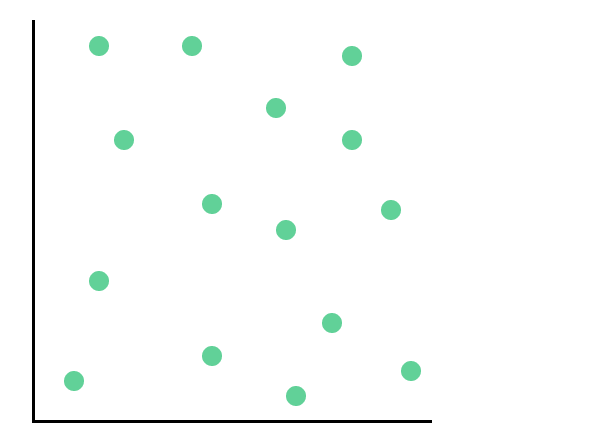

The idea here is that we can represent each listing as a point on this axis. With each point on the axis, we can get a general idea of how "close" two points are to each other, which represents how "similar" the two points are. The diagram shows the points in a 2D-plane, but the k-nearest neighbors algorithm can be generalized to any number of dimensions. Now that we have each listing in space, we have a nightly rental price associated with them.

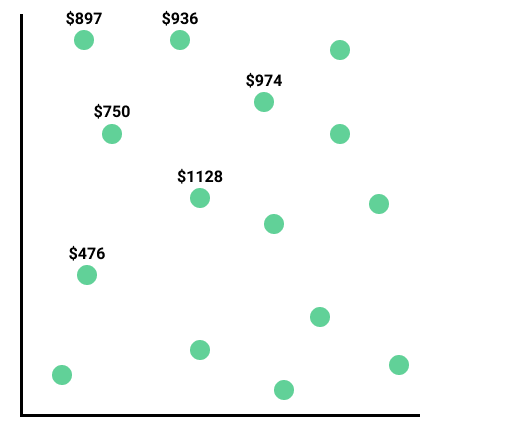

Now let's say that we have a new listing that we want to try to create a new price for. We don't have a nightly rent for it, but we do have some data on it that allows us to place it on the same grid as the other listings.

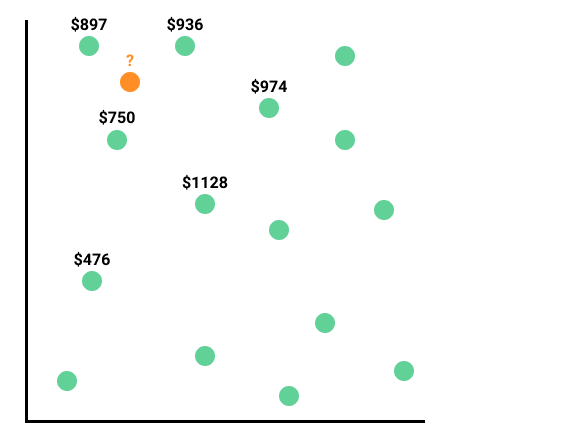

In this view, we may start understanding how the algorithm works. If we assume that similar listings should be priced similarly, then it might be reasonable to base the price of this new listing based on those that are the closest to it. In other words, we'll look at the neighbors to judge what our price should be. For this example, we'll look at the closest three neighbors and base the new price as the average of the three neighbors.

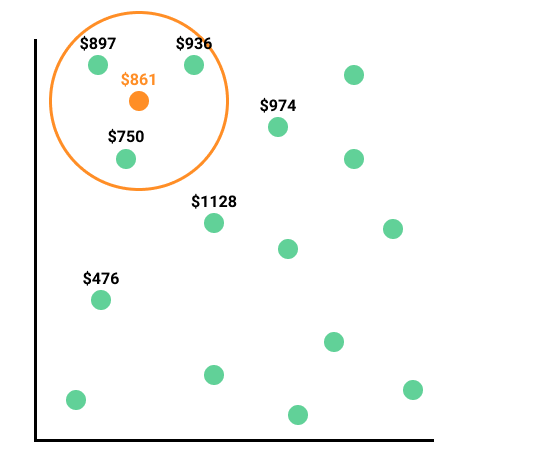

For convenience, we've drawn a circle centered around the new listing to demonstrate that the three points were its closest neighbors. There are several small details that we've glazed over in these illustrations. The important thing to grasp is that we can represent each listing as a point in space and then use these points to judge the price of a new point in this space

We'll be referring to the k-nearest neighbors algorithm as both "algorithm" and "model". This is because we are using the k-nearest neighbor algorithm as our machine learning model. These two words may have different meanings in other contexts, but for our uses, they will be the same. Before we move on, we've provided another new listing. Using what we've learned, calculate a price for it.

**Task**

We have a new listing show in the diagram below:

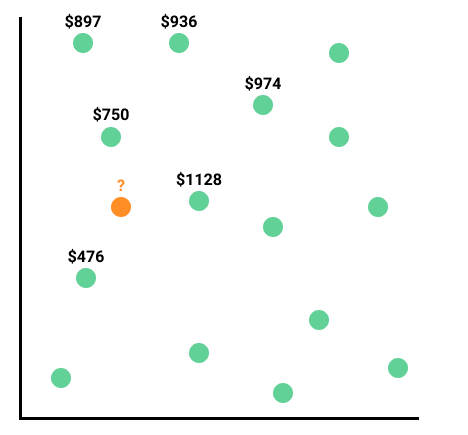

1. Using visual judgment, calculate the rent for this new listing using the closest three neighbors. Assign this new price to the variable `predicted_rent`.

**Answer**

`predicted_rent <- mean(c(476, 750, 1128))`

Above, we gave a general intuition of how the k-nearest neighbors algorithm worked and how we would predict what a good nightly rental rate would be. We calculated our rental rate based off the three neighbors that were the "closest" or most similar to the point that we wanted to get a rate for, but we just picked the neighbors visually. We would prefer having a numerical value to measure similarity since numbers have inherent order to them. But what does it mean to be close or similar? In the diagram we showed, anything within the arbitrarily drawn circle was deemed "closest".

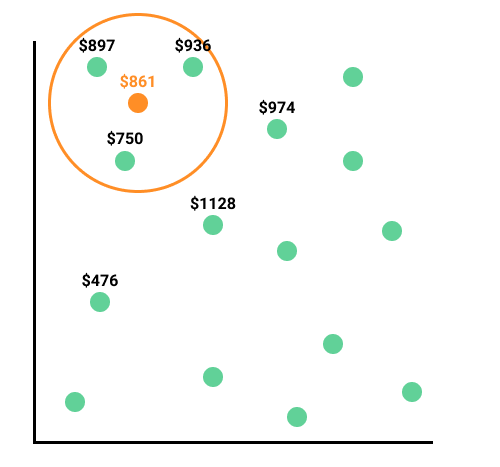

A number is preferred to visual inspection. Once we have a numerical value, we are able to start ranking each of the neighbors in terms of their similarity to a given point.

Recall that the first thing we did was to lay out all of the listings in our data onto an axis. In our example, we used a two dimensional axis. Therefore, each listing could be represented somewhere on this axis, where the coordinates of each listing was then just the combination of those two numbers. Getting everything on a grid not only gives us a way to visualize each of the points, it also gives us a way to numerically describe similarity. Turning each listing into a point allows us to calculate a **distance** between them. The smaller the distance is between two points, the more "similar" they would be to each other. Visually, we would just replace the orange circle with lines from the new listing to all the other listings.

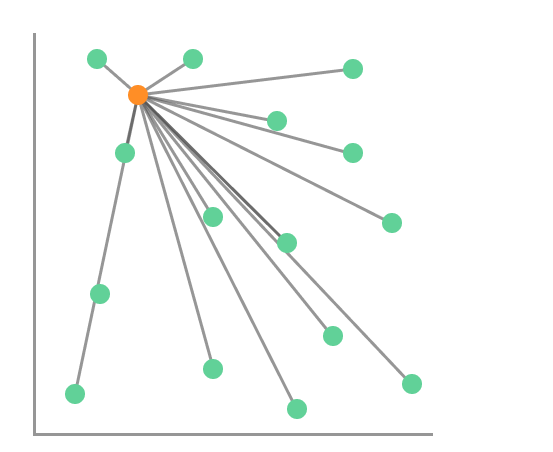


We'll use **Euclidean distance**. If we describe our two axis as 
**x**
 and 
**y**
 respectively, then we would describe the coordinates of two points as 
$(
x_
1
,
y_
1
)$
 and 
$(
x_
2
,
y_
2
)$
. To calculate the Euclidean distance between these two points, we would use the following formula:

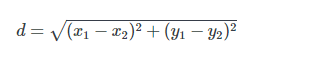

We'll use just one feature or column in the dataset, to keep things simple as we learn the machine learning workflow. With just one numerical value, this reduces space to one dimension: the number line. Putting each of the listings in space would be like placing them on a number line since each coordinate corresponds to a single value 
**x**
. In this **univariate case**, the formula for Euclidean distance would simplify to the absolute difference between two points:

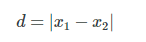

**Task**

Let's say that the living space that we want to rent out can accommodate 3 people. The corresponding column in our dataset that has this information is **accomodates**. Calculate the distance between our three person listing, the first living space in the dataset, and our own.

**Answer**

`dc_listings <- read.csv('dc_airbnb.csv')
first_row_acc_value <- dc_listings$accommodates[1]
our_acc_value <- 3`

`first_distance <- abs(our_acc_value - first_row_acc_value)`

The Euclidean distance between the first listing in `dc_listings` and our own living space was `1`. This information by itself doesn't tell us much, we actually need to know the distance between our three room space and all the other listings in the dataset. After we calculate all of these distances, we'll be able to rank the distances and choose however many closest neighbors that we want.

**Task**

1. Calculate the distance between each value in the accommodates column in `dc_listings` and the value 3.
2. Assign these distance values to a new column called `distance`.

**Answer**

`dc_listings <- read.csv('dc_airbnb.csv')`

`our_acc_value <- 3`

`dc_listings <- dc_listings %>%
  mutate(
    distance = abs(accommodates - our_acc_value)
  )`

We are using a univariate version of the k-nearest neighbors algorithm, but there is a problem we have to deal with. Given that rental pricing can depend on many factors other than the number of accommodations, it isn't likely that the predicted price we get will be very useful. 

If we were to look at the different values that were present in the `distance` column, we would see there are many listings that also have exactly three rooms (corresponding to a distance of 0).

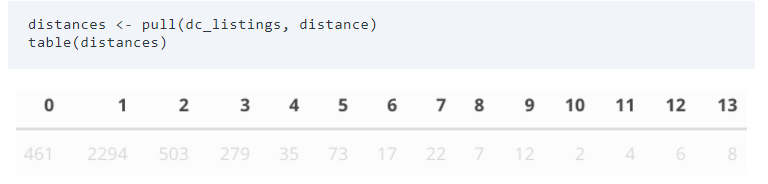

Many living spaces can accommodate three people just like ours. It's hard to really see if any of these 461 listings are truly similar to our own since they are essentially the same as our listing from an accommodation perspective. The best we can do in this situation is to randomly pick three of the "closest neighbors" since all of them technically are as close as they can get to our own rental listing. Randomization helps us since it will prevent any bias that may happen when there are many more candidate neighbors than we need. It frees us from having to make any arbitrary decisions that might bias the resulting rent prediction.

**Task**

Perform the randomization and pick three listings to calculate the new rental price from.

1. Get a vector of all of the row indices where distance is `0`. The `which()` function could be useful here.
2. Use the `sample()` function to randomly pick three of these indices. Assign these three indices to the variable `random_three_indices`.

**Answer**

`dc_listings <- dc_listings %>%
  mutate(
    distance = abs(accommodates - our_acc_value)
  )`
  
`zero_distance_indices <- which(dc_listings$distance == 0)
random_three_indices <- sample(zero_distance_indices, 3, replace = FALSE)`

Before we can compute the average price, we need to clean the `price` column.

**Task**

* Clean the `price` column and convert into numeric 

**Answer**

`dc_listings <- dc_listings %>%
  mutate(
    price = as.character(price),
    tidy_price = str_replace_all(price, "\\$", ""),
    tidy_price = str_replace_all(tidy_price, ",", ""),
    tidy_price = as.numeric(tidy_price)
  )`

Now that we have the outcome in the expected data type, we can finally calculate the average rental price of the three random listings. This average will be the model's "prediction" for a good price for our new 3-room listing.

**Task**

Using `random_three_indices`, calculate the average price of these three random listings. Assign this value to the variable `mean_price`.

**Answer**

`mean_price <- mean(dc_listings$tidy_price[random_three_indices])`

Now we have a good grasp of the intuition behind the algorithm and the importance of Euclidean distance to our concept of "similarity". We used a univariate case of the k-nearest neighbors algorithm which didn't perform well, but we used it to gain insight into how more general cases might work.

We'll continue working through the machine learning workflow, where we'll actually assess if the predictions the model makes are truly accurate or not.